In [1]:
!pip install yfinance ta

     |████████████████████████████████| 6.4 MB 12.9 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Created wheel for ta: filename=ta-0.9.0-py3-none-any.whl size=28908 sha256=21ff30ab795d9dbe5808ed467dd34da7fc845d5e131ea3fc4b4e86a6f6279a11
  Stored in directory: /root/.cache/pip/wheels/72/78/64/cc1c01506a1010a9845e9bd7c69333730f7174661228ea4f98
Successfully built ta
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium=

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from sklearn import preprocessing
from ta.volatility import BollingerBands
from ta.trend import MACD
from ta.momentum import RSIIndicator
from keras.models import load_model
from keras.layers import Conv1D,MaxPool1D,Bidirectional,LSTM,Dropout,TimeDistributed
from keras.layers import Dense,GlobalAveragePooling2D
from ta.trend import IchimokuIndicator
from sklearn.linear_model import LinearRegression
from keras.layers import Conv1D,Flatten,MaxPooling1D,Bidirectional,LSTM,Dropout,TimeDistributed,MaxPool2D
from keras.layers import Dense,GlobalAveragePooling2D
import matplotlib.pyplot as plt
import yfinance as yf
import math

In [3]:
#@markdown Select whether you would like to store data in your personal drive.
#@markdown
#@markdown If you select **yes**, you will need to authorize Colab to access
#@markdown your personal drive
#@markdown
#@markdown If you select **no**, then any changes you make will diappear when
#@markdown this Colab's VM restarts after some time of inactivity...
use_gdrive = 'yes'  #@param ["yes", "no"]

if use_gdrive == 'yes':
  from google.colab import drive
  drive.mount('/gdrive')
  root = '/gdrive/My Drive/Colab Notebooks/COMP5513'
  import os
  if not os.path.isdir(root):
    os.mkdir(root)
  os.chdir(root)
  print(f'\nChanged CWD to "{root}"')
else:
  from IPython import display
  display.display(display.HTML(
      '<h1 style="color:red">CHANGES NOT PERSISTED</h1>'))

Mounted at /gdrive

Changed CWD to "/gdrive/My Drive/Colab Notebooks/COMP5513"


In [4]:
model = load_model('lstm-cnn.h5')
#model = load_model('lstm-cnn-20220310.h5')  #updated model

In [5]:
symbol = '2800.HK'#'AAPL'#'2800.HK'
stock = yf.Ticker(symbol)
df = stock.history(start="2020-12-31", end="2022-12-31")#stock.history(period="max")
stock_data = df[['Open',  'High',  'Low',  'Close', 'Volume']]

In [6]:
indicator_bollinger = BollingerBands(close=stock_data["Close"], window=20, window_dev=2)
macd = MACD(close=stock_data["Close"])
rsi = RSIIndicator(close=stock_data["Close"])
ichi = IchimokuIndicator(high=stock_data["High"],low=stock_data["Low"])

#get the technical indicators
stock_data['macd'] = macd.macd()
stock_data['macd_signal'] = macd.macd_signal()
stock_data['rsi'] = rsi.rsi()
stock_data['bollinger_mavg'] = indicator_bollinger.bollinger_mavg()
stock_data['bollinger_hband'] = indicator_bollinger.bollinger_hband()
stock_data['bollinger_lbond'] = indicator_bollinger.bollinger_lband()
stock_data['ichimoku_a'] = ichi.ichimoku_a()
stock_data['ichimoku_b'] = ichi.ichimoku_b()
stock_data['ichimoku_base_line'] = ichi.ichimoku_base_line()
stock_data['ichimoku_conversion_line'] = ichi.ichimoku_conversion_line()
stock_data = stock_data.fillna(0)

#stock_data = stock_data[:-1]
stock_orig = stock_data.copy()

#stock = stock[250:]
stock_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Open,High,Low,Close,Volume,macd,macd_signal,rsi,bollinger_mavg,bollinger_hband,bollinger_lbond,ichimoku_a,ichimoku_b,ichimoku_base_line,ichimoku_conversion_line
Date,,,,,,,,,,,,,,,
2020-12-31,27.440001,27.440001,27.440001,27.440001,0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,27.440001,0.000000,0.000000
2021-01-04,27.360001,27.680000,27.320000,27.639999,228402605,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,27.500000,0.000000,0.000000
2021-01-05,27.480000,27.879999,27.340000,27.740000,139782911,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,27.599999,0.000000,0.000000
2021-01-06,27.799999,27.940001,27.580000,27.840000,145424037,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,27.630000,0.000000,0.000000
2021-01-07,27.840000,27.920000,27.620001,27.700001,134972086,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,27.630000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-07,21.500000,21.500000,20.959999,21.219999,217260223,-0.619358,-0.340605,22.628970,23.739,25.965440,21.512559,22.739999,23.059999,23.059999,22.419999
2022-03-08,21.280001,21.440001,20.760000,20.879999,262888986,-0.730871,-0.418658,20.918539,23.559,26.079396,21.038603,22.545000,22.960000,22.960000,22.130000
2022-03-09,21.000000,21.120001,20.240000,20.780001,385661835,-0.817887,-0.498504,20.429440,23.350,26.057338,20.642661,22.205000,22.700000,22.700000,21.710000


In [7]:
scaler = preprocessing.MinMaxScaler()
scaled_values = scaler.fit_transform(stock_data.iloc[:,0:3])
stock_data.iloc[:,0:3] = scaled_values

y_scaler = preprocessing.MinMaxScaler()
scaled_values = y_scaler.fit_transform(np.array(stock_data.iloc[:,3]).reshape(-1,1))
stock_data.iloc[:,3] = scaled_values

scaler = preprocessing.MinMaxScaler()
scaled_values = scaler.fit_transform(stock_data.iloc[:,4:])
stock_data.iloc[:,4:] = scaled_values

stock_data

,Open,High,Low,Close,Volume,macd,macd_signal,rsi,bollinger_mavg,bollinger_hband,bollinger_lbond,ichimoku_a,ichimoku_b,ichimoku_base_line,ichimoku_conversion_line
Date,,,,,,,,,,,,,,,
2020-12-31,0.639252,0.623552,0.687023,0.636711,0.000000,0.597875,0.549595,0.000000,0.000000,0.000000,0.000000,0.000000,0.690962,0.000000,0.000000
2021-01-04,0.631776,0.646718,0.675573,0.655832,0.582183,0.597875,0.549595,0.000000,0.000000,0.000000,0.000000,0.000000,0.699708,0.000000,0.000000
2021-01-05,0.642991,0.666023,0.677481,0.665392,0.356297,0.597875,0.549595,0.000000,0.000000,0.000000,0.000000,0.000000,0.714286,0.000000,0.000000
2021-01-06,0.672897,0.671815,0.700382,0.674952,0.370676,0.597875,0.549595,0.000000,0.000000,0.000000,0.000000,0.000000,0.718659,0.000000,0.000000
2021-01-07,0.676636,0.669884,0.704199,0.661568,0.344035,0.597875,0.549595,0.000000,0.000000,0.000000,0.000000,0.000000,0.718659,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-07,0.084112,0.050193,0.068702,0.042065,0.553782,0.182536,0.254125,0.234058,0.790588,0.825647,0.748038,0.752731,0.052478,0.769950,0.734119
2022-03-08,0.063551,0.044402,0.049618,0.009560,0.670087,0.107756,0.186415,0.216367,0.784594,0.829271,0.731557,0.746276,0.037901,0.766611,0.724623
2022-03-09,0.037383,0.013514,0.000000,0.000000,0.983027,0.049403,0.117149,0.211308,0.777633,0.828570,0.717789,0.735022,0.000000,0.757930,0.710871


In [8]:
stock_final = stock_data.drop(['Open','Volume','bollinger_mavg','ichimoku_conversion_line'],1)

features = 11 #including the close price

window_size = 60
week = 7
X = []
Y = []
#print(stock_final)
for i in range(0 , len(stock_data) - window_size , 1):
  X.append(np.array(stock_final.iloc[i:i+window_size,:]).reshape(window_size * features,1))
  Y.append(np.array(stock_data.iloc[i+window_size,3]).reshape(1,1))

test_X = np.array(X)
test_label = np.array(Y)
test_X = test_X.reshape(test_X.shape[0],features,window_size,1)

stock_final
# train_X,test_X,train_label,test_label = train_test_split(X, Y, test_size=1,shuffle=False)
# len_t = len(train_X)
# # train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_label, test_size=0.2,shuffle=True)
# train_X = np.array(train_X)
# test_X = np.array(test_X)
# train_label = np.array(train_label)
# test_label = np.array(test_label)
# # valid_label = np.array(valid_label)
# # valid_X = np.array(valid_X)
# train_X = train_X.reshape(train_X.shape[0],features,window_size,1)
# test_X = test_X.reshape(test_X.shape[0],features,window_size,1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,High,Low,Close,macd,macd_signal,rsi,bollinger_hband,bollinger_lbond,ichimoku_a,ichimoku_b,ichimoku_base_line
Date,,,,,,,,,,,
2020-12-31,0.623552,0.687023,0.636711,0.597875,0.549595,0.000000,0.000000,0.000000,0.000000,0.690962,0.000000
2021-01-04,0.646718,0.675573,0.655832,0.597875,0.549595,0.000000,0.000000,0.000000,0.000000,0.699708,0.000000
2021-01-05,0.666023,0.677481,0.665392,0.597875,0.549595,0.000000,0.000000,0.000000,0.000000,0.714286,0.000000
2021-01-06,0.671815,0.700382,0.674952,0.597875,0.549595,0.000000,0.000000,0.000000,0.000000,0.718659,0.000000
2021-01-07,0.669884,0.704199,0.661568,0.597875,0.549595,0.000000,0.000000,0.000000,0.000000,0.718659,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2022-03-07,0.050193,0.068702,0.042065,0.182536,0.254125,0.234058,0.825647,0.748038,0.752731,0.052478,0.769950
2022-03-08,0.044402,0.049618,0.009560,0.107756,0.186415,0.216367,0.829271,0.731557,0.746276,0.037901,0.766611
2022-03-09,0.013514,0.000000,0.000000,0.049403,0.117149,0.211308,0.828570,0.717789,0.735022,0.000000,0.757930


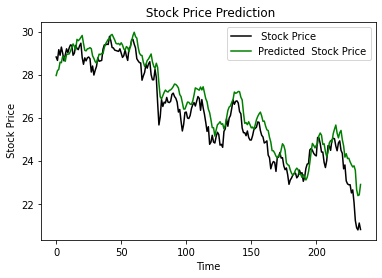

In [9]:
predicted  = model.predict(test_X)

real_price = stock_orig.iloc[window_size:,3].values
predicted = np.array(predicted[:,0]).reshape(-1,1)
predicted = y_scaler.inverse_transform(predicted)
plt.plot(real_price, color = 'black', label = ' Stock Price')
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

# print("validation MSE")   #different from the MSE in model training
# model.evaluate(test_X,test_label)

In [10]:
len_t = len(test_label)
len_t

235

In [11]:
len(predicted)

235

In [12]:
testing_data = stock_orig.iloc[-len(predicted):,:]

In [13]:
len(testing_data)

235

In [14]:
# for i,j in zip(real_price,predicted):
#   print(i,j)

In [15]:
predicted[-1]

array([22.89279], dtype=float32)

In [16]:
testing_data[:]

,Open,High,Low,Close,Volume,macd,macd_signal,rsi,bollinger_mavg,bollinger_hband,bollinger_lbond,ichimoku_a,ichimoku_b,ichimoku_base_line,ichimoku_conversion_line
Date,,,,,,,,,,,,,,,
2021-03-30,28.680000,28.980000,28.639999,28.820000,70138159,-0.259510,-0.204503,46.549344,29.039,29.952146,28.125854,29.135000,29.560000,29.460000,28.810000
2021-03-31,29.000000,29.040001,28.600000,28.660000,51539018,-0.253717,-0.214346,44.763098,28.972,29.784345,28.159655,29.020000,29.560000,29.390000,28.650001
2021-04-01,28.820000,29.219999,28.760000,29.160000,119073490,-0.206401,-0.212757,51.080581,28.959,29.750300,28.167700,28.895000,29.560000,29.200001,28.590000
2021-04-07,29.320000,29.360001,28.860001,28.900000,70149604,-0.187719,-0.207749,48.005915,28.942,29.722963,28.161037,28.755001,29.560000,28.940001,28.570001
2021-04-08,28.760000,29.340000,28.760000,29.280001,61542723,-0.140629,-0.194325,52.505582,28.969,29.757464,28.180536,28.755001,29.560000,28.940001,28.570001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-07,21.500000,21.500000,20.959999,21.219999,217260223,-0.619358,-0.340605,22.628970,23.739,25.965440,21.512559,22.739999,23.059999,23.059999,22.419999
2022-03-08,21.280001,21.440001,20.760000,20.879999,262888986,-0.730871,-0.418658,20.918539,23.559,26.079396,21.038603,22.545000,22.960000,22.960000,22.130000
2022-03-09,21.000000,21.120001,20.240000,20.780001,385661835,-0.817887,-0.498504,20.429440,23.350,26.057338,20.642661,22.205000,22.700000,22.700000,21.710000


In [33]:
def rsi_signal(rsi):
  rsi_val = float(rsi)
  if rsi_val >= 70:
    return -1
  if rsi_val <= 30:
    return 1
  else:
    return 0

def predict_signal(current, predict, threshold=0.05):
  diff = (current - predict)/current
  # print(diff)
  #if True:
  if abs(diff) >= threshold:
    if np.sign(diff) > 0:
      return -1
    else:
      return 1
  else:
    return 0

#moving average -> may test later
#all in/ all out Vs. 
def trade(price, capital, state, stock, rsi, macd, ml, bb, threshold=0.15, min_lot=500):
  remain = 0
  score = rsi*0.2+macd*0.2+bb*0.2+ml*0.4
  #print(score)
  if score > threshold and state != 1:
    lots = math.floor(capital*score / (price*min_lot))
    amount = price * lots * min_lot
    if lots > 1 and capital > amount:
      remain = capital - amount
    else:
      return None, None, None
    return remain, lots, 1
  elif score <= -0.2 and state != 0:
    values = capital + price * stock * min_lot
    return values, 0, 0
  else:
    return None, None, None

def macd_signal(macd, prev_macd, signal, prev_signal):
  if prev_signal > prev_macd and signal < macd:
    return 1
  elif prev_signal < prev_macd and signal > macd:
    return -1
  else:
    return 0

def bollinger_signal(prev_row, curr_row):
  if prev_row['Close'] < prev_row['bollinger_lbond'] and curr_row['Close'] > curr_row['bollinger_lbond']:
    return 1
  elif prev_row['Close'] > prev_row['bollinger_hband'] and curr_row['Close'] < curr_row['bollinger_hband']:
    return -1
  else:
    return 0

In [18]:
# trade(25.4,200000, 0, 0, -1,0,0, 1)

In [34]:
money_sequence = []
count = 0
init_capital = 1000000
init_state = 0
init_stock = 0
cash_in_hand = init_capital
p_signal = 0
p_macd = 0
money_sequence.append(cash_in_hand)
for index, row in testing_data.iterrows():
  if count == 0:
    p_signal = row['macd_signal']
    p_macd = row['macd']
    count += 1
    prev_r = row
    continue
  if count < len(predicted)-1:
    rsi_sig = rsi_signal(row['rsi'])
    ml_sig = predict_signal(row['Close'], predicted[count][0])
    macd_sig = macd_signal(row['macd'], p_macd, row['macd_signal'], p_signal)
    bollinger_sig = bollinger_signal(prev_r, row)
    #print(rsi_sig, macd_sig, bollinger_sig, ml_sig, row['Close'], predicted[count][0])
    remain, lots, state = trade(row['Close'],cash_in_hand, init_state, init_stock, rsi_sig,macd_sig,ml_sig,bollinger_sig)
    if (remain != None):
      cash_in_hand = remain
      init_state = state
      init_stock = lots
      print("Trading at: ", index, " long " if init_state == 1 else " short ", row['Close'], cash_in_hand, init_stock)
    if state == 0:
      money_sequence.append(remain)
    p_signal = row['macd_signal']
    p_macd = row['macd']
    count += 1
  prev_r = row

if init_stock > 0:
  market_money = cash_in_hand+row['Close']*init_stock*500
  money_sequence.append(market_money)
money_sequence

Trading at:  2021-04-01 00:00:00  long  29.15999984741211 810460.0009918213 13
Trading at:  2021-05-03 00:00:00  short  28.479999542236328 995579.9980163574 0
Trading at:  2021-05-04 00:00:00  long  28.780000686645508 808509.9935531616 13
Trading at:  2021-06-02 00:00:00  short  29.579999923706055 1000779.993057251 0
Trading at:  2021-06-25 00:00:00  long  29.6200008392334 808249.9876022339 13
Trading at:  2021-07-02 00:00:00  short  28.739999771118164 995059.986114502 0
Trading at:  2021-07-12 00:00:00  long  28.100000381469727 798359.9834442139 14
Trading at:  2021-08-19 00:00:00  short  25.84000015258789 979239.9845123291 0
Trading at:  2021-08-20 00:00:00  long  25.3799991607666 395500.00381469727 46
Trading at:  2021-09-15 00:00:00  short  25.780000686645508 988440.019607544 0
Trading at:  2021-09-16 00:00:00  long  25.360000610351562 595360.0101470947 31
Trading at:  2021-10-21 00:00:00  short  26.6200008392334 1007970.0231552124 0
Trading at:  2021-10-29 00:00:00  long  25.52000

[1000000,
 995579.9980163574,
 1000779.993057251,
 995059.986114502,
 979239.9845123291,
 988440.019607544,
 1007970.0231552124,
 1004560.004234314,
 999310.0128173828,
 994830.0170898438,
 1007070.0216293335,
 1005470.0155258179,
 981470.0155258179]

In [35]:
final_profit = money_sequence[-1]/init_capital - 1
print("final profit is ", final_profit*100,"%")

final profit is  -1.8529984474182082 %


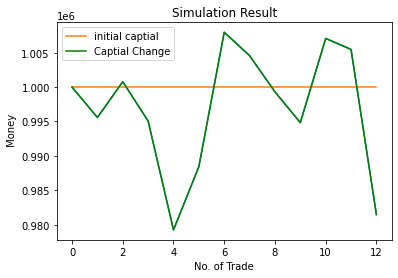

In [36]:
plt.plot(money_sequence)

x_coordinates = [i for i in range(len(money_sequence))]
y_coordinates = [1000000]*len(money_sequence)
plt.plot(x_coordinates, y_coordinates, label = 'initial captial')
plt.plot(money_sequence, color = 'green', label = 'Captial Change')
plt.title('Simulation Result')
plt.xlabel('No. of Trade')
plt.ylabel(' Money')
plt.legend()
plt.show()